1985 - 2016 자살율 관계 분석

Dataset
- country(국가)
- year(년도)
- sex(성별)
- age(연령대)
- sicides_no(???)
- population(해당 국가,성별,연령대의 인구?)
- suicide/100k pop (자살율)
- country-year(국가-년도)
- HDI for year(인간개발지수 = 행복지수)
- gdp_for_year(년간 gdp지수)
- gdp_per_capta(1인당 gdp지수)
- generation(세대)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('D:\Python EXAM\Kaggle_Suicide Rate\master\master.csv')

In [5]:
data.shape

(27820, 12)

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
data.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4945,Canada,1987,female,35-54 years,298,3176700,9.38,Canada1987,NaN,"431,316,742,081",18124,Silent
22603,Singapore,2001,female,5-14 years,2,242800,0.82,Singapore2001,NaN,"89,286,208,629",28774,Millenials
5062,Canada,1997,male,25-34 years,535,2359600,22.67,Canada1997,NaN,"652,825,364,726",23245,Generation X
26440,United Arab Emirates,2008,male,15-24 years,18,776831,2.32,United Arab Emirates2008,NaN,"315,474,615,739",48457,Millenials
26113,Ukraine,1990,female,15-24 years,165,3454600,4.78,Ukraine1990,0.705,"81,456,918,679",1698,Generation X


In [10]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [12]:
data=data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
Country               27820 non-null object
Year                  27820 non-null int64
Gender                27820 non-null object
Age                   27820 non-null object
SuicidesNo            27820 non-null int64
Population            27820 non-null int64
Suicides100kPop       27820 non-null float64
CountryYear           27820 non-null object
GdpForYearMoney       27820 non-null object
GdpPerCapitalMoney    27820 non-null int64
Generation            27820 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [ ]:
# 국가,나이 남녀 각각 자살율에 대하여 가시화하기

In [18]:
data=data.drop(['HDIForYear'],axis=1)
data.shape

(27820, 11)

In [ ]:
data.groupby(['Country','Year','Gender'])

[Text(0.5, 0, 'Gender'), Text(0.5, 1.0, 'Suicidal rate by Gender')]

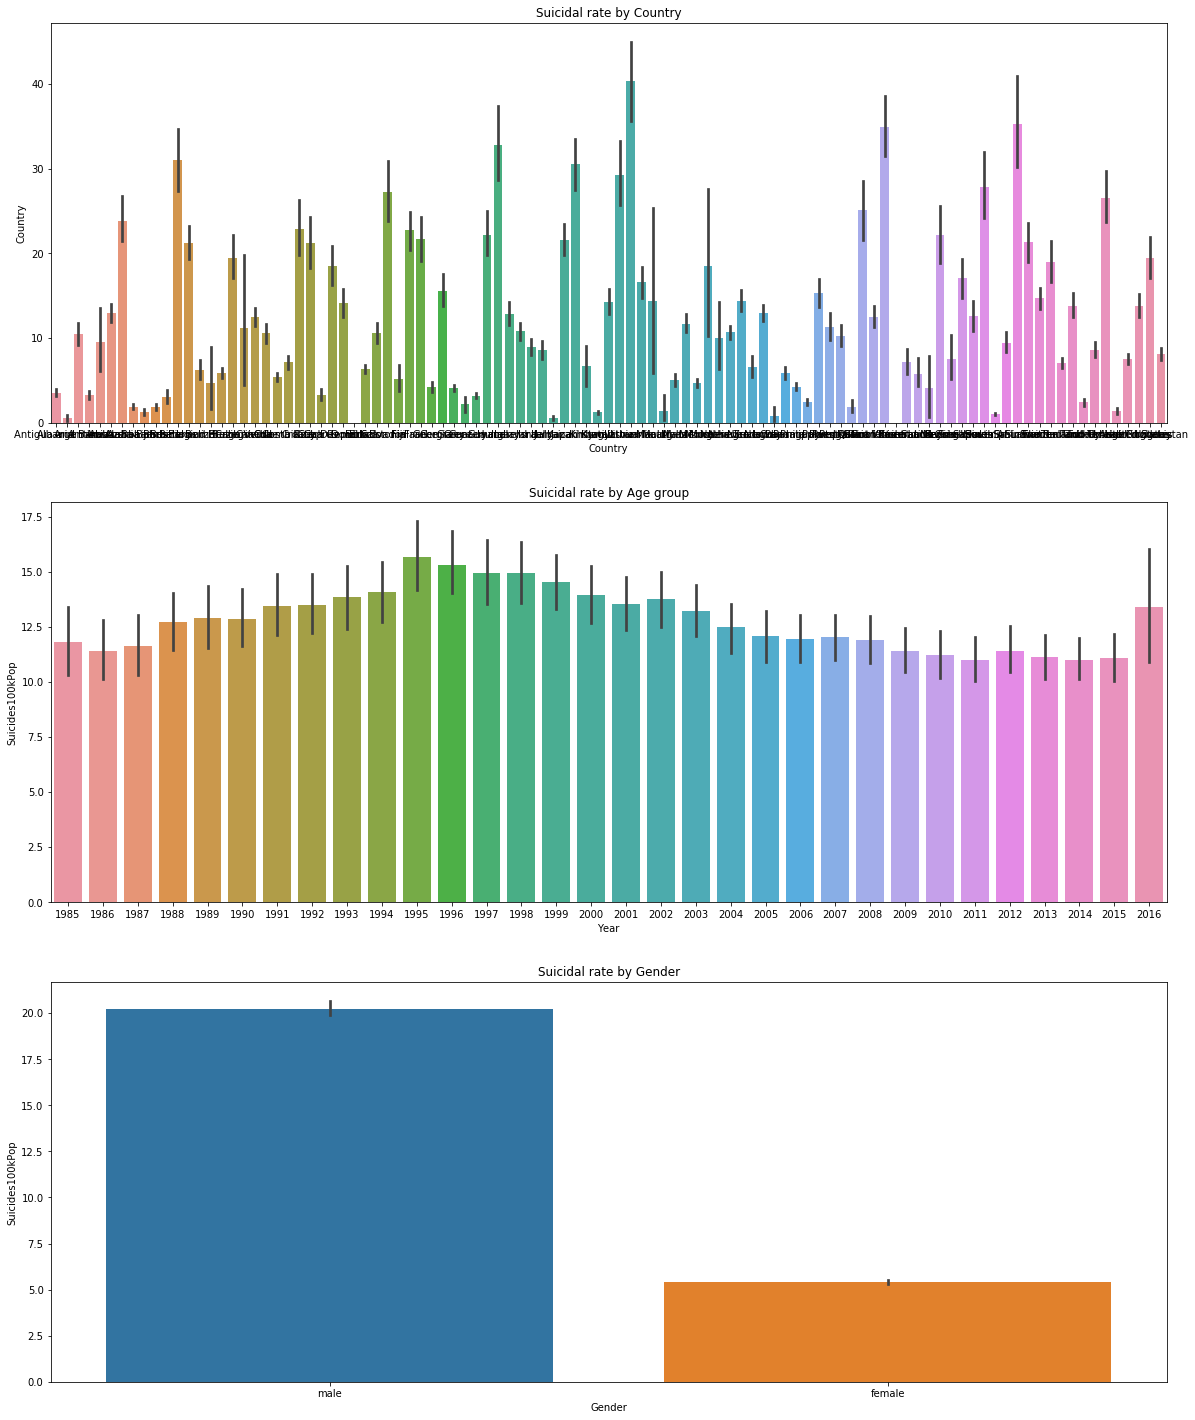

In [24]:
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=3, ncols=1) #3행 1열의 3개 그래프
figure.set_size_inches(20,25) #가로,세로 길이

sns.barplot(data=data, x="Country", y="Suicides100kPop", ax=ax1)
sns.barplot(data=data, x="Year", y="Suicides100kPop", ax=ax2)
sns.barplot(data=data, x="Gender", y="Suicides100kPop", ax=ax3)

ax1.set(ylabel='Country',title="Suicidal rate by Country")
ax2.set(xlabel='Year',title="Suicidal rate by Age group")
ax3.set(xlabel='Gender', title="Suicidal rate by Gender")